## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  1.501794  1.032096 -1.486201  0.744298 -0.112242  0.930065
1  0.632266 -0.072902  0.432142  0.387502 -0.779334  0.460957
2  0.283808  0.937405 -0.939379  0.121473  0.234729  0.954444
3  0.129290  0.468115  0.263660  0.029264  0.867088  0.711974
4 -1.791435 -1.182259  1.554166  1.040097  0.155519  0.179600


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9985944	total: 67.7ms	remaining: 1m 7s
1:	learn: 0.9891062	total: 68.2ms	remaining: 34s
2:	learn: 0.9792231	total: 68.8ms	remaining: 22.9s
3:	learn: 0.9691199	total: 69.4ms	remaining: 17.3s
4:	learn: 0.9592194	total: 70ms	remaining: 13.9s
5:	learn: 0.9486085	total: 70.5ms	remaining: 11.7s
6:	learn: 0.9396443	total: 71.1ms	remaining: 10.1s
7:	learn: 0.9301546	total: 71.7ms	remaining: 8.88s
8:	learn: 0.9223925	total: 72.2ms	remaining: 7.95s
9:	learn: 0.9143300	total: 72.7ms	remaining: 7.19s
10:	learn: 0.9049412	total: 73.2ms	remaining: 6.58s
11:	learn: 0.8944668	total: 73.6ms	remaining: 6.06s
12:	learn: 0.8846664	total: 74.1ms	remaining: 5.63s
13:	learn: 0.8749938	total: 74.6ms	remaining: 5.25s
14:	learn: 0.8678139	total: 75.1ms	remaining: 4.93s
15:	learn: 0.8590997	total: 75.6ms	remaining: 4.65s
16:	learn: 0.8519966	total: 76ms	remaining: 4.4s
17:	learn: 0.8437395	total: 76.6ms	remaining: 4.18s
18:	learn: 0.8359930	total: 77ms	remaining: 3.98s
1

87:	learn: 0.4643694	total: 109ms	remaining: 1.13s
88:	learn: 0.4601505	total: 109ms	remaining: 1.12s
89:	learn: 0.4569700	total: 110ms	remaining: 1.11s
90:	learn: 0.4532205	total: 110ms	remaining: 1.1s
91:	learn: 0.4497664	total: 110ms	remaining: 1.09s
92:	learn: 0.4458357	total: 111ms	remaining: 1.08s
93:	learn: 0.4426837	total: 111ms	remaining: 1.07s
94:	learn: 0.4388735	total: 112ms	remaining: 1.06s
95:	learn: 0.4358679	total: 112ms	remaining: 1.05s
96:	learn: 0.4325214	total: 112ms	remaining: 1.05s
97:	learn: 0.4295452	total: 113ms	remaining: 1.04s
98:	learn: 0.4254739	total: 113ms	remaining: 1.03s
99:	learn: 0.4225006	total: 114ms	remaining: 1.02s
100:	learn: 0.4189511	total: 114ms	remaining: 1.02s
101:	learn: 0.4150607	total: 115ms	remaining: 1.01s
102:	learn: 0.4123877	total: 116ms	remaining: 1.01s
103:	learn: 0.4096392	total: 116ms	remaining: 999ms
104:	learn: 0.4062512	total: 116ms	remaining: 992ms
105:	learn: 0.4031254	total: 117ms	remaining: 985ms
106:	learn: 0.4002876	tota

258:	learn: 0.1391012	total: 187ms	remaining: 535ms
259:	learn: 0.1380506	total: 188ms	remaining: 534ms
260:	learn: 0.1371086	total: 188ms	remaining: 532ms
261:	learn: 0.1362522	total: 188ms	remaining: 531ms
262:	learn: 0.1353117	total: 189ms	remaining: 529ms
263:	learn: 0.1342863	total: 189ms	remaining: 528ms
264:	learn: 0.1334477	total: 190ms	remaining: 526ms
265:	learn: 0.1326305	total: 190ms	remaining: 524ms
266:	learn: 0.1317913	total: 190ms	remaining: 523ms
267:	learn: 0.1308390	total: 191ms	remaining: 522ms
268:	learn: 0.1298408	total: 191ms	remaining: 520ms
269:	learn: 0.1290307	total: 192ms	remaining: 519ms
270:	learn: 0.1280857	total: 192ms	remaining: 518ms
271:	learn: 0.1272822	total: 193ms	remaining: 516ms
272:	learn: 0.1265306	total: 193ms	remaining: 515ms
273:	learn: 0.1258381	total: 194ms	remaining: 513ms
274:	learn: 0.1250781	total: 194ms	remaining: 512ms
275:	learn: 0.1243034	total: 195ms	remaining: 511ms
276:	learn: 0.1233585	total: 195ms	remaining: 510ms
277:	learn: 

483:	learn: 0.0403985	total: 292ms	remaining: 312ms
484:	learn: 0.0402608	total: 293ms	remaining: 311ms
485:	learn: 0.0399896	total: 293ms	remaining: 310ms
486:	learn: 0.0397256	total: 294ms	remaining: 309ms
487:	learn: 0.0394686	total: 294ms	remaining: 308ms
488:	learn: 0.0392257	total: 294ms	remaining: 308ms
489:	learn: 0.0390220	total: 295ms	remaining: 307ms
490:	learn: 0.0387716	total: 295ms	remaining: 306ms
491:	learn: 0.0385750	total: 296ms	remaining: 305ms
492:	learn: 0.0383363	total: 296ms	remaining: 304ms
493:	learn: 0.0381593	total: 296ms	remaining: 303ms
494:	learn: 0.0379862	total: 297ms	remaining: 303ms
495:	learn: 0.0377535	total: 297ms	remaining: 302ms
496:	learn: 0.0375861	total: 297ms	remaining: 301ms
497:	learn: 0.0375111	total: 298ms	remaining: 300ms
498:	learn: 0.0372899	total: 298ms	remaining: 300ms
499:	learn: 0.0372165	total: 299ms	remaining: 299ms
500:	learn: 0.0370001	total: 299ms	remaining: 298ms
501:	learn: 0.0369283	total: 300ms	remaining: 297ms
502:	learn: 

654:	learn: 0.0203155	total: 371ms	remaining: 195ms
655:	learn: 0.0202177	total: 371ms	remaining: 195ms
656:	learn: 0.0201235	total: 372ms	remaining: 194ms
657:	learn: 0.0200411	total: 372ms	remaining: 193ms
658:	learn: 0.0199446	total: 373ms	remaining: 193ms
659:	learn: 0.0198346	total: 373ms	remaining: 192ms
660:	learn: 0.0197431	total: 374ms	remaining: 192ms
661:	learn: 0.0197137	total: 374ms	remaining: 191ms
662:	learn: 0.0196251	total: 375ms	remaining: 190ms
663:	learn: 0.0195962	total: 375ms	remaining: 190ms
664:	learn: 0.0195028	total: 376ms	remaining: 189ms
665:	learn: 0.0194379	total: 376ms	remaining: 189ms
666:	learn: 0.0193321	total: 377ms	remaining: 188ms
667:	learn: 0.0193021	total: 377ms	remaining: 187ms
668:	learn: 0.0192200	total: 378ms	remaining: 187ms
669:	learn: 0.0191570	total: 378ms	remaining: 186ms
670:	learn: 0.0190954	total: 378ms	remaining: 186ms
671:	learn: 0.0189929	total: 379ms	remaining: 185ms
672:	learn: 0.0189636	total: 379ms	remaining: 184ms
673:	learn: 

870:	learn: 0.0091177	total: 476ms	remaining: 70.5ms
871:	learn: 0.0091054	total: 477ms	remaining: 70ms
872:	learn: 0.0090791	total: 477ms	remaining: 69.4ms
873:	learn: 0.0090369	total: 477ms	remaining: 68.8ms
874:	learn: 0.0090036	total: 478ms	remaining: 68.3ms
875:	learn: 0.0089765	total: 478ms	remaining: 67.7ms
876:	learn: 0.0089355	total: 479ms	remaining: 67.2ms
877:	learn: 0.0088977	total: 479ms	remaining: 66.6ms
878:	learn: 0.0088912	total: 480ms	remaining: 66ms
879:	learn: 0.0088479	total: 480ms	remaining: 65.5ms
880:	learn: 0.0088081	total: 481ms	remaining: 64.9ms
881:	learn: 0.0087702	total: 481ms	remaining: 64.4ms
882:	learn: 0.0087313	total: 482ms	remaining: 63.8ms
883:	learn: 0.0087002	total: 482ms	remaining: 63.3ms
884:	learn: 0.0086740	total: 482ms	remaining: 62.7ms
885:	learn: 0.0086326	total: 483ms	remaining: 62.1ms
886:	learn: 0.0086069	total: 483ms	remaining: 61.6ms
887:	learn: 0.0085694	total: 484ms	remaining: 61ms
888:	learn: 0.0085430	total: 484ms	remaining: 60.5ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

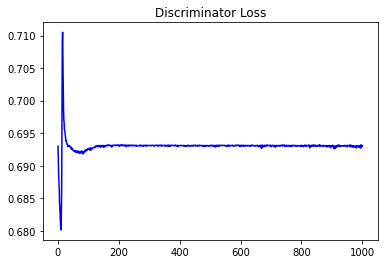

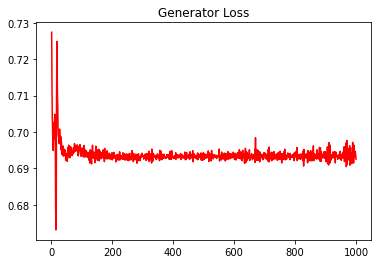

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15771357947268988


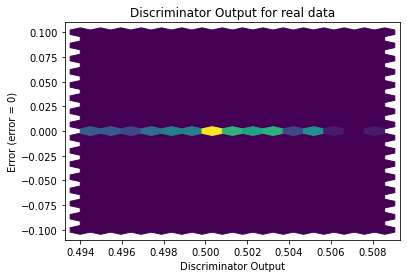

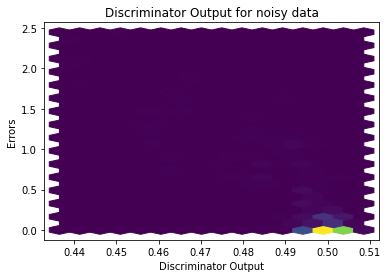

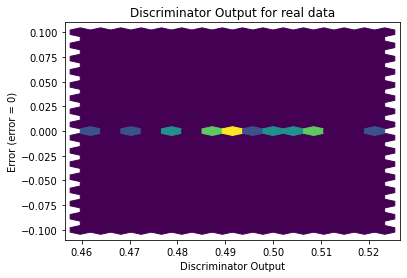

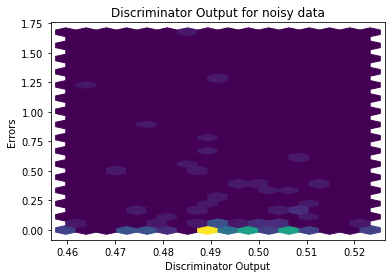

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


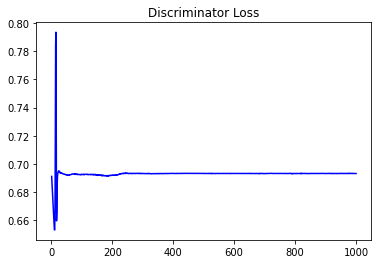

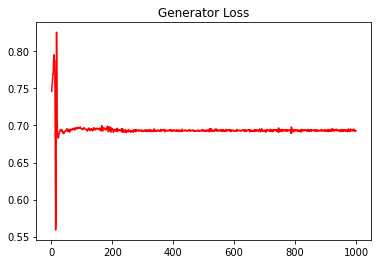

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17455323481331186


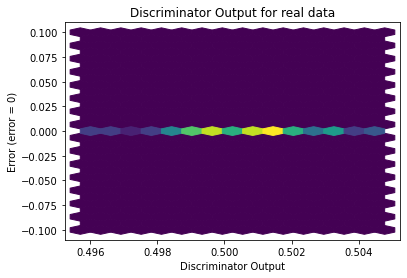

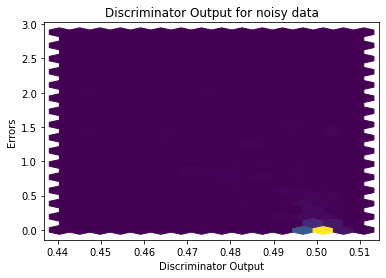

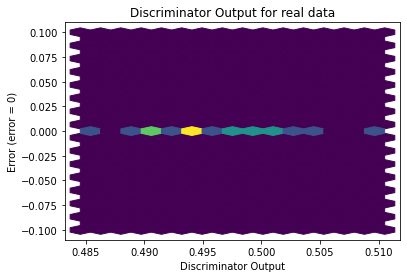

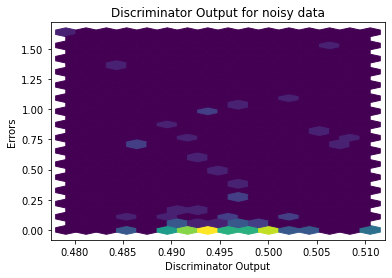

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0714]], requires_grad=True)
